In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import seaborn as sns
import time 
import pickle 
import warnings
from tqdm import tqdm
from PIL import Image
from datetime import datetime
from sklearn.metrics import mean_squared_error 

In [2]:
# 인열 : 가상 환경에서 바로 경로 설정이 안되는 오류가 있었습니다.
#  "../btc_usd_1d.pkl"로 경로 수정하는 게 좋아보입니다.
with open("btc_usd_1d.pkl", "rb") as f:
    df=pickle.load(f)
    df=df.reset_index()
    df.rename({'ot':'Date'},axis=1,inplace=True)
df

,Date,o,h,l,c,v
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06
...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03


In [3]:
import pandas as pd 
import numpy as np
import FinanceDataReader as fdr
import os 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm 

import warnings
warnings.filterwarnings('ignore')

### 다우지수 불러오기

In [4]:
def Merge_DJI(input_df):
    start_date = str(input_df['Date'].iloc[0])
    end_date = str(input_df['Date'].iloc[-1])
    DJI_df = fdr.DataReader('dji', start_date, end_date).reset_index()
    dji_df=DJI_df.drop(['Open','High','Low','Change'],axis=1)
    dji_df.rename({'Close':'dji_c','Volume':'dji_v'},axis=1,inplace=True)
    input_df=pd.merge(input_df,dji_df,how='outer',on='Date')
    
    return input_df

In [5]:
test_df=df[:]
test_df

,Date,o,h,l,c,v
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06
...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03


In [6]:
test_df=Merge_DJI(test_df)

In [7]:
test_df

,Date,o,h,l,c,v,dji_c,dji_v
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,NaN,NaN
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,NaN,NaN
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,17776.80,86390000.0
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,17879.55,81970000.0
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06,17912.62,99400000.0
...,...,...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03,34715.39,369070000.0
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03,34265.37,523880000.0
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03,NaN,NaN
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03,NaN,NaN


### 원/달러 환율 정보 추가

In [8]:
def Merge_ECR(input_df):
    start_date = str(input_df['Date'].iloc[0])
    end_date = str(input_df['Date'].iloc[-1])
    exr=fdr.DataReader('USD/KRW', start_date, end_date).reset_index()
    exr=exr.drop(['Open','High','Low','Change'],axis=1)
    exr.rename({'Close':'exc_c'},axis=1,inplace=True)
    input_df=pd.merge(input_df,exr,how='outer',on='Date')
    
    return input_df

In [9]:
test_df=Merge_ECR(test_df)
test_df

,Date,o,h,l,c,v,dji_c,dji_v,exc_c
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,NaN,NaN,NaN
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,NaN,NaN,NaN
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,17776.80,86390000.0,1110.09
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,17879.55,81970000.0,1115.32
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06,17912.62,99400000.0,1116.11
...,...,...,...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03,34715.39,369070000.0,1192.42
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03,34265.37,523880000.0,1192.51
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03,NaN,NaN,NaN
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03,NaN,NaN,NaN


In [10]:
test_df=test_df.fillna(method='ffill')
test_df=test_df.fillna(method='bfill')
test_df

,Date,o,h,l,c,v,dji_c,dji_v,exc_c
0,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,17776.80,86390000.0,1110.09
1,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,17776.80,86390000.0,1110.09
2,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,17776.80,86390000.0,1110.09
3,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,17879.55,81970000.0,1115.32
4,2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06,17912.62,99400000.0,1116.11
...,...,...,...,...,...,...,...,...,...
2609,2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03,34715.39,369070000.0,1192.42
2610,2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03,34265.37,523880000.0,1192.51
2611,2022-01-22,36447.37,36825.98,34000.00,35091.11,4.510372e+03,34265.37,523880000.0,1192.51
2612,2022-01-23,35084.79,36574.47,34624.59,36293.62,2.533704e+03,34265.37,523880000.0,1192.51


### 해시레이트 변수 추가 

In [11]:
def Merge_hr(input_df):
    HR_3y_df=pd.read_csv("hash-rate_3y.csv")
    HR_all_df=pd.read_csv("hash-rate_alltime.csv")
    HR_df=HR_all_df.iloc[715:1255]
    HR_df=pd.concat([HR_df,HR_3y_df])
    a=pd.date_range(start=str(input_df['Date'].iloc[0]),end=str(input_df['Date'].iloc[-1]))
    HR_ori_df=pd.DataFrame(a)
    HR_ori_df.rename({0:'Timestamp'},axis=1,inplace=True)
    
    for i in range(len(HR_ori_df['Timestamp'])):
        HR_ori_df['Timestamp'].iloc[i]=str(HR_ori_df['Timestamp'].iloc[i])
        
    HR_ori_df=pd.merge(HR_ori_df,HR_df,how='outer',on='Timestamp')
    HR_ori_df=HR_ori_df[:len(a)+1]
    HR_ori_df=HR_ori_df.drop_duplicates()
    HR_ori_df=HR_ori_df.fillna(method='ffill')
    HR_ori_df=HR_ori_df.fillna(method='bfill')
    HR_ori_df.rename({'Timestamp':'Date'},axis=1,inplace=True)
    
    for i in range(len(input_df['Date'])):
        input_df['Date'].iloc[i]=str(input_df['Date'].iloc[i])
        
    input_df=pd.merge(input_df,HR_ori_df,how='outer',on='Date')
    
    return input_df

In [12]:
test_df=Merge_hr(test_df)

In [13]:
test_df

,Date,o,h,l,c,v,dji_c,dji_v,exc_c,hash-rate
0,2014-11-29 00:00:00,376.42,386.60,372.25,376.72,2.746157e+06,17776.80,86390000.0,1110.09,3.125188e+05
1,2014-11-30 00:00:00,376.57,381.99,373.32,373.34,1.145567e+06,17776.80,86390000.0,1110.09,3.125188e+05
2,2014-12-01 00:00:00,376.40,382.31,373.03,378.39,2.520662e+06,17776.80,86390000.0,1110.09,3.125188e+05
3,2014-12-02 00:00:00,378.39,382.86,375.23,379.25,2.593576e+06,17879.55,81970000.0,1115.32,3.125188e+05
4,2014-12-03 00:00:00,379.25,383.00,374.23,376.67,2.998358e+06,17912.62,99400000.0,1116.11,2.424024e+05
...,...,...,...,...,...,...,...,...,...,...
2609,2022-01-20 00:00:00,41733.21,43518.69,40554.14,40736.05,2.425153e+03,34715.39,369070000.0,1192.42,2.047490e+08
2610,2022-01-21 00:00:00,40654.72,41115.58,35423.00,36495.46,6.201046e+03,34265.37,523880000.0,1192.51,1.754426e+08
2611,2022-01-22 00:00:00,36447.37,36825.98,34000.00,35091.11,4.510372e+03,34265.37,523880000.0,1192.51,1.774749e+08
2612,2022-01-23 00:00:00,35084.79,36574.47,34624.59,36293.62,2.533704e+03,34265.37,523880000.0,1192.51,1.867460e+08


### 먼저 날짜 기준이 가지고 있는 데이터에 존재하지 않음 따라서 추가 지표는 추후 추가를 하는 것으로 하고 일단 가지고 있는 데이터 안에서 preprocessing

In [14]:
def preprocessing(input_df, len_lag) :
    # 이동평균선 추가 5,10,20
    moving_avg=[5,10,20]
    for i in moving_avg:
        input_df[f'{i}_close']=-1
    for index in range(len(input_df)):
        for i in moving_avg:
            input_df[f'{i}_close']=input_df['c'].rolling(window=i).mean()
        
    # p_lag:과거 가격, q_lag:과거 거래량 추가, pq_lag:거래대금 
    for lag in range(1,len_lag+1):
        input_df[f'p_lag_{lag}'] = -1
        input_df[f'q_lag_{lag}'] = -1 
        input_df[f'pq_lag_{lag}'] = -1
        for index in range(lag, len(input_df)):
            input_df.loc[index, f'p_lag_{lag}'] = input_df['c'][index-lag] #1일전, 2일전, ... 가격을 feature로 추가
            input_df.loc[index, f'q_lag_{lag}'] = input_df['v'][index-lag] #1일전, 2일전, ... 거래량을 feature로 추가
            input_df.loc[index, f'pq_lag_{lag}'] = (input_df['c'][index-lag]*input_df['v'][index-lag]) #1일전, 2일전, ... 거래량을 feature로 추가

In [15]:
def OBV_preprocessing(input_df):
    # OBV 산출 및 데이터 프레임에 추가 
    OBV=[]
    OBV.append(0)
    for i in range(1,len(input_df)):
        if input_df['c'].iloc[i] > input_df['c'].iloc[i-1]:
            OBV.append(OBV[-1]+input_df['v'].iloc[i])
        elif price_df['c'].iloc[i]<input_df['c'].iloc[i-1]:
            OBV.append(OBV[-1]-input_df['v'].iloc[i]) 
        else:
            OBV.append(OBV[-1])
            
    # OBV 추가
    input_df['obv']=OBV
    
    # 지수 평균 이동값 계산 
    input_df['obv_ema']=input_df['obv'].ewm(com=20).mean()
    
    # obv가 보통 지수를 위로 뚫으면 매수 신호 아래로 뚫으면 매도 신호 
    input_df['signal_obv']=input_df['obv']-input_df['obv_ema']
    
    moving_avg=[5,20,30]
    for i in moving_avg:
        input_df[f'obv_lag{i}']=-1
    for index in range(len(input_df)):
        for i in moving_avg:
            input_df[f'obv_lag{i}']=input_df['signal_obv'].rolling(window=i).mean()

In [16]:
def gen_train_test1(input_df):
    target=input_df['c'][1:]
    target.loc[len(input_df)]=0
    target.reset_index(drop=True,inplace=True)
    input_df['target']=target

In [17]:
def gen_train_test2(input_df):
    input_df['target']=0
    for i in range(len(input_df)-1):
        input_df['target'].iloc[i]=input_df['c'].iloc[i+1]

In [18]:
def gen_train_test3(input_df,day_val):
    input_df['target']=0
    for i in range(len(input_df)-1):
        if i+day_val>(len(input_df)-1):
            break
        else:
            input_df['target'].iloc[i]=input_df['c'].iloc[i+day_val]

In [19]:
price_df=test_df[:]

In [20]:
price_df

,Date,o,h,l,c,v,dji_c,dji_v,exc_c,hash-rate
0,2014-11-29 00:00:00,376.42,386.60,372.25,376.72,2.746157e+06,17776.80,86390000.0,1110.09,3.125188e+05
1,2014-11-30 00:00:00,376.57,381.99,373.32,373.34,1.145567e+06,17776.80,86390000.0,1110.09,3.125188e+05
2,2014-12-01 00:00:00,376.40,382.31,373.03,378.39,2.520662e+06,17776.80,86390000.0,1110.09,3.125188e+05
3,2014-12-02 00:00:00,378.39,382.86,375.23,379.25,2.593576e+06,17879.55,81970000.0,1115.32,3.125188e+05
4,2014-12-03 00:00:00,379.25,383.00,374.23,376.67,2.998358e+06,17912.62,99400000.0,1116.11,2.424024e+05
...,...,...,...,...,...,...,...,...,...,...
2609,2022-01-20 00:00:00,41733.21,43518.69,40554.14,40736.05,2.425153e+03,34715.39,369070000.0,1192.42,2.047490e+08
2610,2022-01-21 00:00:00,40654.72,41115.58,35423.00,36495.46,6.201046e+03,34265.37,523880000.0,1192.51,1.754426e+08
2611,2022-01-22 00:00:00,36447.37,36825.98,34000.00,35091.11,4.510372e+03,34265.37,523880000.0,1192.51,1.774749e+08
2612,2022-01-23 00:00:00,35084.79,36574.47,34624.59,36293.62,2.533704e+03,34265.37,523880000.0,1192.51,1.867460e+08


In [21]:
OBV_preprocessing(price_df)

In [22]:
preprocessing(price_df,10)

### 학습 일수 변경 식 

In [23]:
gen_train_test2(price_df)

In [24]:
price_df

,Date,o,h,l,c,v,dji_c,dji_v,exc_c,hash-rate,...,p_lag_8,q_lag_8,pq_lag_8,p_lag_9,q_lag_9,pq_lag_9,p_lag_10,q_lag_10,pq_lag_10,target
0,2014-11-29 00:00:00,376.42,386.60,372.25,376.72,2.746157e+06,17776.80,86390000.0,1110.09,3.125188e+05,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,373.34
1,2014-11-30 00:00:00,376.57,381.99,373.32,373.34,1.145567e+06,17776.80,86390000.0,1110.09,3.125188e+05,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,378.39
2,2014-12-01 00:00:00,376.40,382.31,373.03,378.39,2.520662e+06,17776.80,86390000.0,1110.09,3.125188e+05,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,379.25
3,2014-12-02 00:00:00,378.39,382.86,375.23,379.25,2.593576e+06,17879.55,81970000.0,1115.32,3.125188e+05,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,376.67
4,2014-12-03 00:00:00,379.25,383.00,374.23,376.67,2.998358e+06,17912.62,99400000.0,1116.11,2.424024e+05,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,365.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2022-01-20 00:00:00,41733.21,43518.69,40554.14,40736.05,2.425153e+03,34715.39,369070000.0,1192.42,2.047490e+08,...,43933.50,2502.762101,1.099551e+08,42736.00,2442.654151,1.043893e+08,41845.42,3494.013786,1.462085e+08,36495.46
2610,2022-01-21 00:00:00,40654.72,41115.58,35423.00,36495.46,6.201046e+03,34265.37,523880000.0,1192.51,1.754426e+08,...,42571.94,1993.883243,8.488348e+07,43933.50,2502.762101,1.099551e+08,42736.00,2442.654151,1.043893e+08,35091.11
2611,2022-01-22 00:00:00,36447.37,36825.98,34000.00,35091.11,4.510372e+03,34265.37,523880000.0,1192.51,1.774749e+08,...,43102.35,1386.832758,5.977575e+07,42571.94,1993.883243,8.488348e+07,43933.50,2502.762101,1.099551e+08,36293.62
2612,2022-01-23 00:00:00,35084.79,36574.47,34624.59,36293.62,2.533704e+03,34265.37,523880000.0,1192.51,1.867460e+08,...,43102.01,707.658523,3.050150e+07,43102.35,1386.832758,5.977575e+07,42571.94,1993.883243,8.488348e+07,35917.44


In [25]:
final_price_df=price_df.drop(['o','h','l'],axis=1)

In [27]:
price_df.tail(50)

,Date,o,h,l,c,v,dji_c,dji_v,exc_c,hash-rate,...,p_lag_8,q_lag_8,pq_lag_8,p_lag_9,q_lag_9,pq_lag_9,p_lag_10,q_lag_10,pq_lag_10,target
2564,2021-12-06 00:00:00,49484.00,50986.00,47111.00,50555.00,4652.117677,35227.03,418750000.0,1180.54,1.909736e+08,...,57338.55,1377.554549,7.898698e+07,54774.66,1360.565868,7.452453e+07,53789.35,5221.840567,2.808794e+08,50627.32
2565,2021-12-07 00:00:00,50550.09,51991.00,50062.13,50627.32,1719.317619,35719.43,482890000.0,1176.73,1.709880e+08,...,57845.12,2069.734969,1.197241e+08,57338.55,1377.554549,7.898698e+07,54774.66,1360.565868,7.452453e+07,50543.30
2566,2021-12-08 00:00:00,50635.87,51249.41,48656.20,50543.30,1598.435713,35754.75,387650000.0,1175.19,1.865324e+08,...,56974.12,3562.717627,2.029827e+08,57845.12,2069.734969,1.197241e+08,57338.55,1377.554549,7.898698e+07,47593.12
2567,2021-12-09 00:00:00,50535.15,50839.01,47332.43,47593.12,2585.432708,35754.69,353020000.0,1178.15,1.809808e+08,...,57251.59,2515.540720,1.440187e+08,56974.12,3562.717627,2.029827e+08,57845.12,2069.734969,1.197241e+08,47142.42
2568,2021-12-10 00:00:00,47573.43,50132.88,46886.00,47142.42,2705.170704,35970.99,361200000.0,1180.86,1.732086e+08,...,56547.96,2758.144698,1.559675e+08,57251.59,2515.540720,1.440187e+08,56974.12,3562.717627,2.029827e+08,49400.54
2569,2021-12-11 00:00:00,47179.53,49539.40,46789.00,49400.54,1323.039560,35970.99,361200000.0,1180.86,1.761618e+08,...,53743.69,2964.768185,1.593376e+08,56547.96,2758.144698,1.559675e+08,57251.59,2515.540720,1.440187e+08,50124.38
2570,2021-12-12 00:00:00,49420.51,50800.00,48675.00,50124.38,1233.788386,35970.99,361200000.0,1180.86,1.683856e+08,...,49234.97,10025.689669,4.936145e+08,53743.69,2964.768185,1.593376e+08,56547.96,2758.144698,1.559675e+08,46725.02
2571,2021-12-13 00:00:00,50102.31,50226.20,45750.00,46725.02,3337.447929,35650.95,451590000.0,1184.91,1.695883e+08,...,49463.22,5156.666137,2.550653e+08,49234.97,10025.689669,4.936145e+08,53743.69,2964.768185,1.593376e+08,48389.96
2572,2021-12-14 00:00:00,46736.70,48689.30,46310.40,48389.96,2016.589815,35544.18,451230000.0,1185.19,1.780076e+08,...,50555.00,4652.117677,2.351878e+08,49463.22,5156.666137,2.550653e+08,49234.97,10025.689669,4.936145e+08,48876.84
2573,2021-12-15 00:00:00,48386.95,49514.85,46560.00,48876.84,2593.351810,35927.43,432380000.0,1184.57,1.695883e+08,...,50627.32,1719.317619,8.704444e+07,50555.00,4652.117677,2.351878e+08,49463.22,5156.666137,2.550653e+08,47663.42


In [28]:
final_price_df

,Date,c,v,dji_c,dji_v,exc_c,hash-rate,obv,obv_ema,signal_obv,...,p_lag_8,q_lag_8,pq_lag_8,p_lag_9,q_lag_9,pq_lag_9,p_lag_10,q_lag_10,pq_lag_10,target
0,2014-11-29 00:00:00,376.72,2.746157e+06,17776.80,86390000.0,1110.09,3.125188e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,373.34
1,2014-11-30 00:00:00,373.34,1.145567e+06,17776.80,86390000.0,1110.09,3.125188e+05,-1.145567e+06,-5.867536e+05,-5.588130e+05,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,378.39
2,2014-12-01 00:00:00,378.39,2.520662e+06,17776.80,86390000.0,1110.09,3.125188e+05,1.375096e+06,9.934913e+04,1.275747e+06,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,379.25
3,2014-12-02 00:00:00,379.25,2.593576e+06,17879.55,81970000.0,1115.32,3.125188e+05,3.968672e+06,1.138582e+06,2.830090e+06,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,376.67
4,2014-12-03 00:00:00,376.67,2.998358e+06,17912.62,99400000.0,1116.11,2.424024e+05,9.703143e+05,1.101567e+06,-1.312531e+05,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,365.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2022-01-20 00:00:00,40736.05,2.425153e+03,34715.39,369070000.0,1192.42,2.047490e+08,-3.382900e+08,-3.382809e+08,-9.102960e+03,...,43933.50,2502.762101,1.099551e+08,42736.00,2442.654151,1.043893e+08,41845.42,3494.013786,1.462085e+08,36495.46
2610,2022-01-21 00:00:00,36495.46,6.201046e+03,34265.37,523880000.0,1192.51,1.754426e+08,-3.382962e+08,-3.382816e+08,-1.457524e+04,...,42571.94,1993.883243,8.488348e+07,43933.50,2502.762101,1.099551e+08,42736.00,2442.654151,1.043893e+08,35091.11
2611,2022-01-22 00:00:00,35091.11,4.510372e+03,34265.37,523880000.0,1192.51,1.774749e+08,-3.383007e+08,-3.382825e+08,-1.817678e+04,...,43102.35,1386.832758,5.977575e+07,42571.94,1993.883243,8.488348e+07,43933.50,2502.762101,1.099551e+08,36293.62
2612,2022-01-23 00:00:00,36293.62,2.533704e+03,34265.37,523880000.0,1192.51,1.867460e+08,-3.382982e+08,-3.382833e+08,-1.489817e+04,...,43102.01,707.658523,3.050150e+07,43102.35,1386.832758,5.977575e+07,42571.94,1993.883243,8.488348e+07,35917.44


In [29]:
final_price_df.drop('Date',axis=1,inplace=True)

In [30]:
final_price_df

,c,v,dji_c,dji_v,exc_c,hash-rate,obv,obv_ema,signal_obv,obv_lag5,...,p_lag_8,q_lag_8,pq_lag_8,p_lag_9,q_lag_9,pq_lag_9,p_lag_10,q_lag_10,pq_lag_10,target
0,376.72,2.746157e+06,17776.80,86390000.0,1110.09,3.125188e+05,0.000000e+00,0.000000e+00,0.000000e+00,NaN,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,373.34
1,373.34,1.145567e+06,17776.80,86390000.0,1110.09,3.125188e+05,-1.145567e+06,-5.867536e+05,-5.588130e+05,NaN,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,378.39
2,378.39,2.520662e+06,17776.80,86390000.0,1110.09,3.125188e+05,1.375096e+06,9.934913e+04,1.275747e+06,NaN,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,379.25
3,379.25,2.593576e+06,17879.55,81970000.0,1115.32,3.125188e+05,3.968672e+06,1.138582e+06,2.830090e+06,NaN,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,376.67
4,376.67,2.998358e+06,17912.62,99400000.0,1116.11,2.424024e+05,9.703143e+05,1.101567e+06,-1.312531e+05,683154.075048,...,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,-1.00,-1.000000,-1.000000e+00,365.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,40736.05,2.425153e+03,34715.39,369070000.0,1192.42,2.047490e+08,-3.382900e+08,-3.382809e+08,-9.102960e+03,-7379.717331,...,43933.50,2502.762101,1.099551e+08,42736.00,2442.654151,1.043893e+08,41845.42,3494.013786,1.462085e+08,36495.46
2610,36495.46,6.201046e+03,34265.37,523880000.0,1192.51,1.754426e+08,-3.382962e+08,-3.382816e+08,-1.457524e+04,-8878.214846,...,42571.94,1993.883243,8.488348e+07,43933.50,2502.762101,1.099551e+08,42736.00,2442.654151,1.043893e+08,35091.11
2611,35091.11,4.510372e+03,34265.37,523880000.0,1192.51,1.774749e+08,-3.383007e+08,-3.382825e+08,-1.817678e+04,-10962.567299,...,43102.35,1386.832758,5.977575e+07,42571.94,1993.883243,8.488348e+07,43933.50,2502.762101,1.099551e+08,36293.62
2612,36293.62,2.533704e+03,34265.37,523880000.0,1192.51,1.867460e+08,-3.382982e+08,-3.382833e+08,-1.489817e+04,-12777.220469,...,43102.01,707.658523,3.050150e+07,43102.35,1386.832758,5.977575e+07,42571.94,1993.883243,8.488348e+07,35917.44


In [45]:
train_df=final_price_df.iloc[2000:2550]
test_df=final_price_df.iloc[2550:2604]
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

In [46]:
print(train_df.shape)
print(test_df.shape)

(550, 46)
(54, 46)


In [47]:
X_train=train_df.drop('target',axis=1,inplace=False)
y_train=train_df['target']
#x_train=X_train[:1500]
#x_valid=X_train[1500:]
#y_train=y_train[:1500]
#y_valid=y_train[1500:]
X_test=test_df.drop('target',axis=1,inplace=False)
y_test=test_df['target']

In [48]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
pred = xgb.predict(X_test)

In [50]:
pred

array([56476.742, 57042.453, 57863.777, 56776.875, 55194.746, 55049.285,
       58089.85 , 58268.684, 56097.926, 58434.47 , 57469.06 , 54381.87 ,
       50272.3  , 50206.492, 49656.188, 49668.027, 50129.434, 47164.566,
       48917.59 , 50728.25 , 48996.125, 46854.508, 49560.914, 48847.504,
       48224.312, 45990.55 , 46639.23 , 44489.867, 45810.87 , 49925.32 ,
       49183.496, 50465.566, 50915.4  , 49619.152, 47885.055, 47896.15 ,
       48190.24 , 47705.973, 46645.777, 46351.203, 47497.055, 45947.42 ,
       45100.37 , 45991.598, 43841.44 , 43755.426, 44063.305, 43848.355,
       42820.46 , 41867.863, 42475.066, 46319.426, 44341.75 , 43804.035],
      dtype=float32)

In [51]:
y_test.head(30)

0     57579.99
1     57185.06
2     58990.14
3     53789.35
4     54774.66
5     57338.55
6     57845.12
7     56974.12
8     57251.59
9     56547.96
10    53743.69
11    49234.97
12    49463.22
13    50555.00
14    50627.32
15    50543.30
16    47593.12
17    47142.42
18    49400.54
19    50124.38
20    46725.02
21    48389.96
22    48876.84
23    47663.42
24    46210.92
25    46881.87
26    46704.67
27    46915.00
28    48929.86
29    48618.99
Name: target, dtype: float64

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

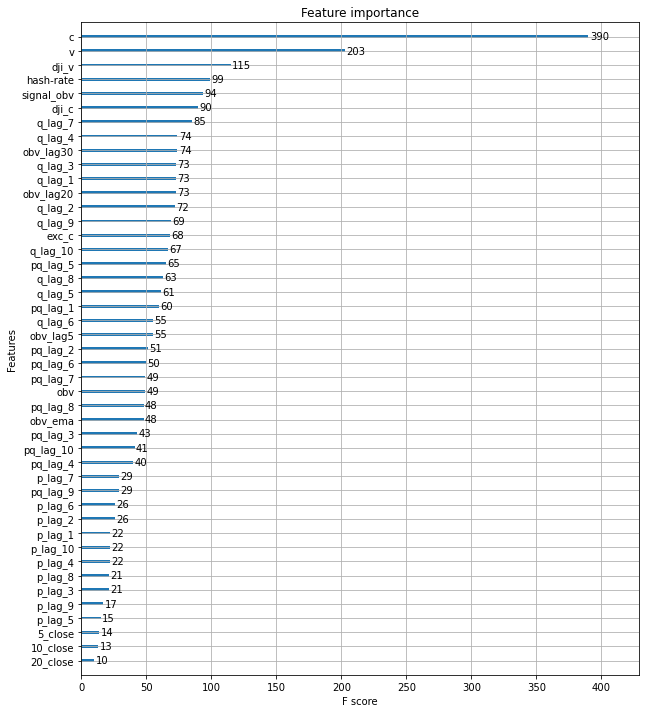

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb, ax=ax)

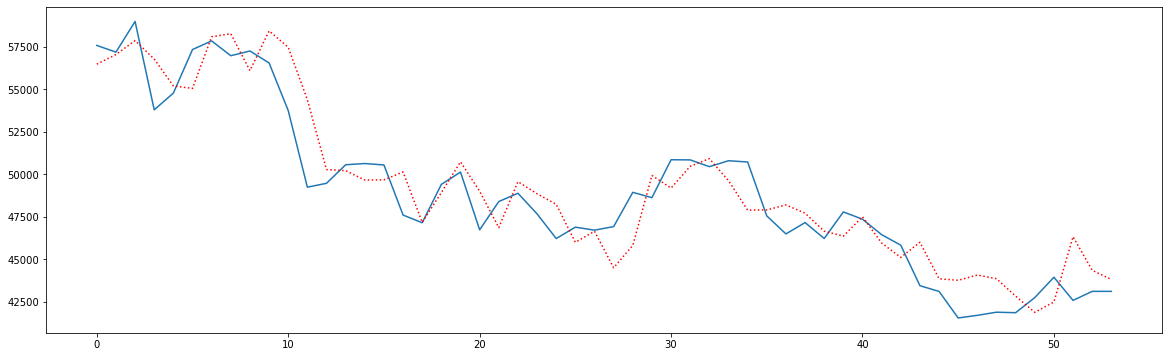

In [53]:
plt.figure(figsize=(20, 6))
plt.plot(y_test)
plt.plot(pred, color='red', linestyle=":")

In [54]:
pred

array([56476.742, 57042.453, 57863.777, 56776.875, 55194.746, 55049.285,
       58089.85 , 58268.684, 56097.926, 58434.47 , 57469.06 , 54381.87 ,
       50272.3  , 50206.492, 49656.188, 49668.027, 50129.434, 47164.566,
       48917.59 , 50728.25 , 48996.125, 46854.508, 49560.914, 48847.504,
       48224.312, 45990.55 , 46639.23 , 44489.867, 45810.87 , 49925.32 ,
       49183.496, 50465.566, 50915.4  , 49619.152, 47885.055, 47896.15 ,
       48190.24 , 47705.973, 46645.777, 46351.203, 47497.055, 45947.42 ,
       45100.37 , 45991.598, 43841.44 , 43755.426, 44063.305, 43848.355,
       42820.46 , 41867.863, 42475.066, 46319.426, 44341.75 , 43804.035],
      dtype=float32)

In [55]:
y_test.head(50)

0     57579.99
1     57185.06
2     58990.14
3     53789.35
4     54774.66
5     57338.55
6     57845.12
7     56974.12
8     57251.59
9     56547.96
10    53743.69
11    49234.97
12    49463.22
13    50555.00
14    50627.32
15    50543.30
16    47593.12
17    47142.42
18    49400.54
19    50124.38
20    46725.02
21    48389.96
22    48876.84
23    47663.42
24    46210.92
25    46881.87
26    46704.67
27    46915.00
28    48929.86
29    48618.99
30    50850.00
31    50841.48
32    50442.22
33    50791.21
34    50718.11
35    47543.30
36    46483.36
37    47150.71
38    46214.37
39    47777.42
40    47350.22
41    46439.89
42    45820.00
43    43435.80
44    43097.60
45    41535.66
46    41690.77
47    41875.81
48    41845.42
49    42736.00
Name: target, dtype: float64

In [56]:
result=mean_squared_error(y_test, pred,squared=False)
print(result)

1749.291525704989


In [57]:
diff = np.mean(np.abs(pred-y_test)/y_test)

In [58]:
diff

0.028804355131793555

### 데이터 정규화 처리 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(X_test)

In [ ]:
xgb.fit(x_train_scaled, y_train)
pred=xgb.predict(x_test_scaled)
plt.figure(figsize=(20, 6))
plt.plot(y_test)
plt.plot(pred, color='red', linestyle=":")

In [ ]:
pred

In [ ]:
y_test

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb, ax=ax)